# QAC239: Assignment 2 (100 points)

## 1. Comparing face detectors (35 points)



### 1.1 Create a face detection function for each of the following methods (6 points)


* Haar Cascade Face Detector in OpenCV (2 points)
* HoG Face Detector in Dlib (2 points)
* Deep Learning based Face Detector in Dlib (2 points)

In [1]:
!pip install face_recognition

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 100.1 MB 28 kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566185 sha256=0f7b6e2323f8ebfd8bcbd8793bb000416bdcc439704018b5f4ce461109ea3dce
  Stored in directory: /root/.cache/pip/wheels/d6/81/3c/884bcd5e1c120ff548d57c2ecc9ebf3281c9a6f7c0e7e7947a
Successfully built face-recognition-models


In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import dlib
import pandas as pd
import os
import face_recognition
import time
from PIL import Image
import torch
from torchvision import transforms

### 1.2 Use these functions to detect the faces in the images of the `img_faceDetect` folder (12 points)

- Create a dataframe based on the detection results. Each row is an image. The dataframe should have the following columns: filename, no. of detected faces using haar cascade detector, no. of detected faces using HoG face detector, and no. of detected faces using deep learning based detector in Dlib. 
- Make sure you sort the dataframe based on the column of filename and print out the dataframe 

In [3]:
pwd

'/content'

In [4]:
# Download the img_faceDetect zip file
!gdown https://drive.google.com/uc?id=15IbzGjeHd48aiEj_XK40sv90FdDeqnMH

Downloading...
From: https://drive.google.com/uc?id=15IbzGjeHd48aiEj_XK40sv90FdDeqnMH
To: /content/img_faceDetect.zip
100% 1.28M/1.28M [00:00<00:00, 153MB/s]


In [5]:
# Unzip the zip file
!unzip /content/img_faceDetect.zip

Archive:  /content/img_faceDetect.zip
   creating: img_faceDetect/
  inflating: __MACOSX/._img_faceDetect  
  inflating: img_faceDetect/ad2.jpg  
  inflating: __MACOSX/img_faceDetect/._ad2.jpg  
  inflating: img_faceDetect/ad3.jpg  
  inflating: __MACOSX/img_faceDetect/._ad3.jpg  
  inflating: img_faceDetect/ad1.jpg  
  inflating: __MACOSX/img_faceDetect/._ad1.jpg  
  inflating: img_faceDetect/ad4.jpg  
  inflating: __MACOSX/img_faceDetect/._ad4.jpg  
  inflating: img_faceDetect/.DS_Store  
  inflating: __MACOSX/img_faceDetect/._.DS_Store  
  inflating: img_faceDetect/ad5.jpg  
  inflating: __MACOSX/img_faceDetect/._ad5.jpg  
  inflating: img_faceDetect/ad7.jpg  
  inflating: __MACOSX/img_faceDetect/._ad7.jpg  
  inflating: img_faceDetect/ad6.jpg  
  inflating: __MACOSX/img_faceDetect/._ad6.jpg  
  inflating: img_faceDetect/ad8.png  
  inflating: __MACOSX/img_faceDetect/._ad8.png  


In [6]:
df = pd.DataFrame(columns = ['image file name', 'numfaces_haar','numfaces_hog','numfaces_deepl'])

In [9]:
!wget https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/haarcascade_frontalface_default.xml \
    -O haarcascade_frontalface_default.xml
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

def Haar_Cascade (image_path):
  
  img  = cv2.imread(image_path)
  gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) 
  img_haar = img.copy()
  faces = face_cascade.detectMultiScale(gray, 1.01, 5)

    
  return faces




def HoG(image_path):
  img  = cv2.imread(image_path)
  gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) 
  im = np.float32(gray) / 255.0
  face_detect = dlib.get_frontal_face_detector()

  # The 2 in the second argument indicates that we upsample the image
  # 2 time.  This will make everything bigger and allow us to detect more
  # faces.
  rects = face_detect(gray, 2)
  return rects

!wget https://github.com/davisking/dlib-models/raw/master/mmod_human_face_detector.dat.bz2
!bunzip2 'mmod_human_face_detector.dat.bz2' # decompressed the .bz2 file

dnnFaceDetector = dlib.cnn_face_detection_model_v1('mmod_human_face_detector.dat')


def Deep_Learning(image_path):
  img = cv2.imread(image_path)
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  img_dp = img.copy()
  rects = dnnFaceDetector(gray, 2) 
  return rects

--2022-11-11 16:23:47--  https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 930127 (908K) [text/plain]
Saving to: ‘haarcascade_frontalface_default.xml’

haarcascade_frontal 100%[===================>] 908.33K  --.-KB/s    in 0.005s  

2022-11-11 16:23:48 (195 MB/s) - ‘haarcascade_frontalface_default.xml’ saved [930127/930127]

--2022-11-11 16:23:48--  https://github.com/davisking/dlib-models/raw/master/mmod_human_face_detector.dat.bz2
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubuserco

In [7]:
cd '/content/img_faceDetect'

/content/img_faceDetect


In [10]:
for item in os.listdir('/content/img_faceDetect'):
  if item[-3:] == 'jpg':
    df = df.append({'image file name' : item, 'numfaces_haar' : len(Haar_Cascade(item)), 'numfaces_hog':len(HoG(item)),'numfaces_deepl':len(Deep_Learning(item))},ignore_index = True)
  elif item[-3:] == 'png':
    im1 = Image.open('/content/img_faceDetect/ad8.png')
    im1 = im1.convert("RGB")
    im1.save('ad8.jpg')
    item = '/content/img_faceDetect/ad8.jpg'
    os.remove('/content/img_faceDetect/ad8.png')

    df = df.append({'image file name' : item, 'numfaces_haar' : len(Haar_Cascade(item)), 'numfaces_hog':len(HoG(item)),'numfaces_deepl':len(Deep_Learning(item))},ignore_index = True)

In [11]:
df

image file name numfaces_haar numfaces_hog numfaces_deepl
0                          ad3.jpg            14            8              8
1                          ad1.jpg             4            1              2
2                          ad6.jpg             1            1              1
3  /content/img_faceDetect/ad8.jpg             2            2              2
4                          ad7.jpg            19           16             17
5                          ad4.jpg             4            0              1
6                          ad5.jpg             5            4              4
7                          ad2.jpg             9            3              6

### 1.3 Take a look at the images and compare the three methods using the following criteria (12 points)

- **Accuracy**\
Compare the face recognition results with the correct number of faces. Which one is the most accurate method?

The deep learning method had more accurate results for all ads compared to hog.  The Haar Cascade method had so many false positives that it clearly cannot be more accurate than deep learning

- **Speed**\
You can use the time library to calculate the time. Which one is the fastest?\
`t0 = time.time()`\
`t1 = time.time()`\
`total_time = t1-t0`

- **Frontal faces vs non-frontal faces**\
Which detector fails to handle non-frontal face?

When an image has a non-frontal face, the Haar Cascade tends to pick up many false positives, making it very inacurate.  

The HoG  methods fail to detect tends to fail to detect non-fronal faces which makes it inaccurate but not as bad as Haar Cascade.

- **Performance under occlusion**\
Which detector fails to handle occlusion?

Haar Cascade fails the most when handling occlusion.



In [12]:
t0 = time.time()
for path in os.listdir('/content/img_faceDetect'):
  if path[-3:] == 'jpg':
    Deep_Learning(path)
t1 = time.time()
Deep_time = t1-t0
print('Deep Learning time is',Deep_time)

t0 = time.time()
for path in os.listdir('/content/img_faceDetect'):
  if path[-3:] == 'jpg':
    HoG(path)
t1 = time.time()
Hog_time = t1-t0
print('HoG time is',Hog_time)


t0 = time.time()
for path in os.listdir('/content/img_faceDetect'):
  if path[-3:] == 'jpg':
    Haar_Cascade(path)
t1 = time.time()
Haar_time = t1-t0
print('Haar Cascade time is',Haar_time)



Deep Learning time is 2.1480748653411865
HoG time is 7.93014669418335
Haar Cascade time is 13.934991836547852


### 1.4 Displaying face detecting results (5 points)

Pick the best method and 
- draw green bounding boxes around detected faces
- add an index to each bounding box (make sure the index does not block the face)
- display the images 

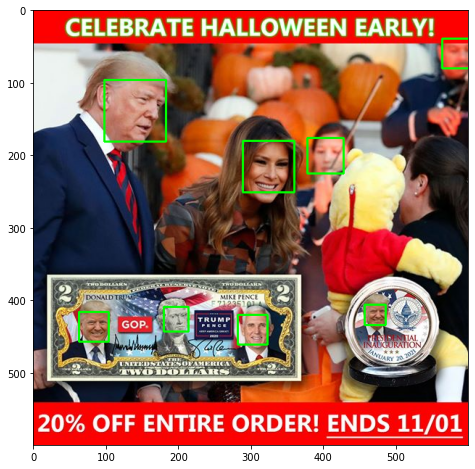

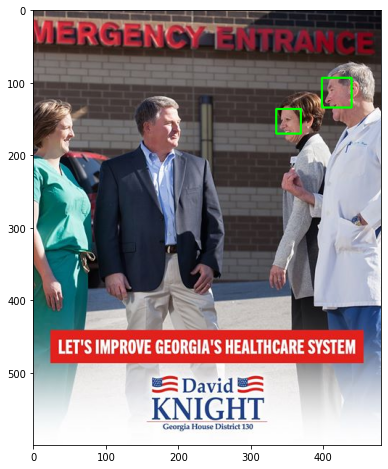

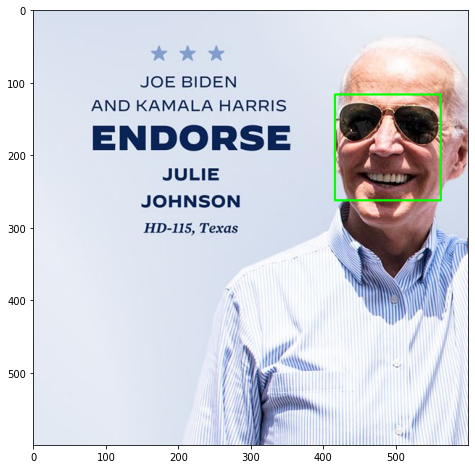

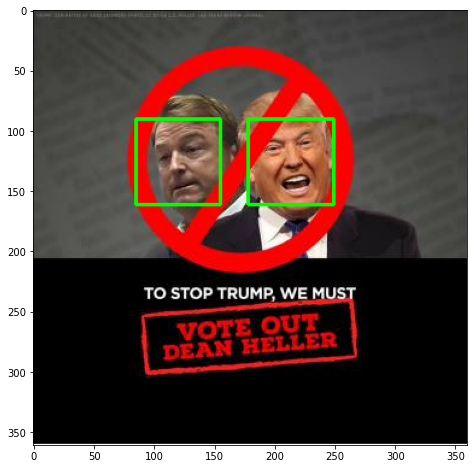

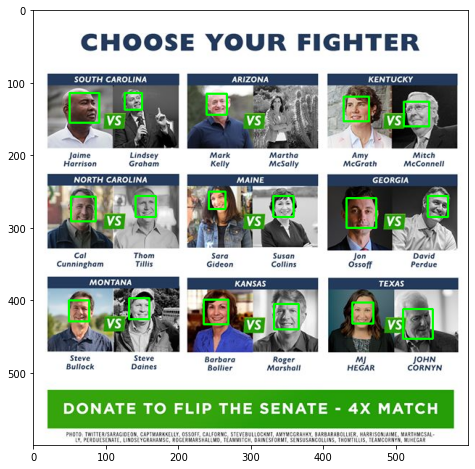

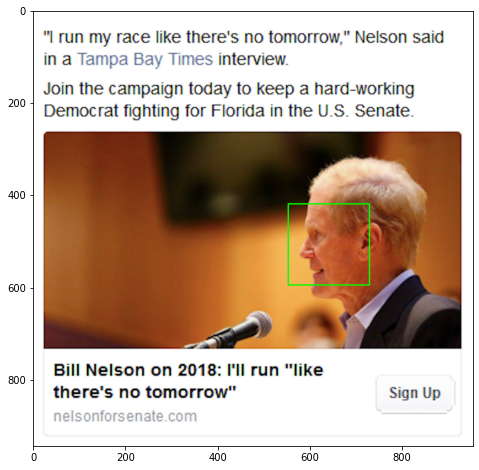

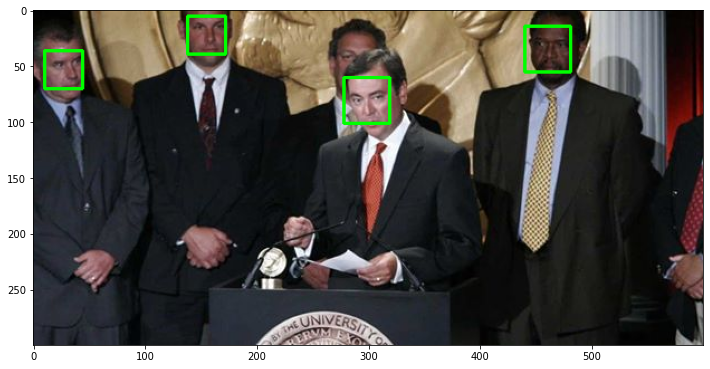

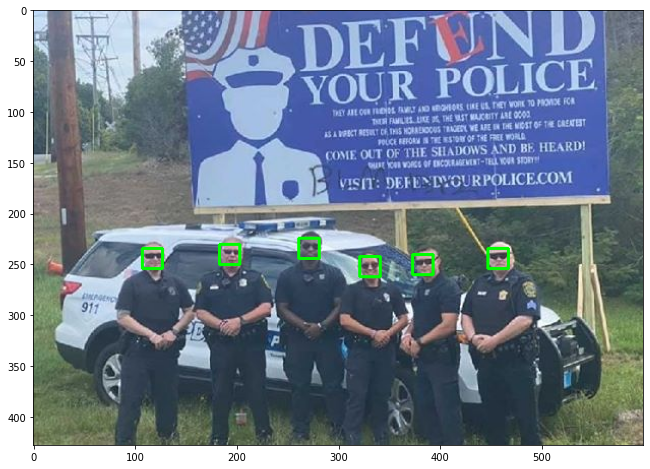

In [14]:
for path in os.listdir('/content/img_faceDetect'):
  if path[-3:] == 'jpg':
    img = cv2.imread(path)

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_dp = img.copy()



    rects = dnnFaceDetector(gray, 2) 

    for (i, rect) in enumerate(rects):
        x1 = rect.rect.left()
        y1 = rect.rect.top()
        x2 = rect.rect.right()
        y2 = rect.rect.bottom()
        # Rectangle around the face
        cv2.rectangle(img_dp, (x1, y1), (x2, y2), (0, 255, 0), 2)

    plt.figure(figsize=(12,8))
    plt.imshow(cv2.cvtColor(img_dp, cv2.COLOR_BGR2RGB))

In [15]:
os.chdir("..")

## 2. Face Recognition (35 points)

Recognize Donald Trump and Kyrsten Sinema in the facebook ad images of the `img_faceRecog` folder 



In [16]:
# Download the img_faceRecog folder
!gdown https://drive.google.com/uc?id=1K_3YfC8OpxD0zF3MSOKb-iXnD1E9vkOb

Downloading...
From: https://drive.google.com/uc?id=1K_3YfC8OpxD0zF3MSOKb-iXnD1E9vkOb
To: /content/img_faceRecog.zip
100% 11.1M/11.1M [00:00<00:00, 18.0MB/s]


In [17]:
! unzip /content/img_faceRecog.zip

Archive:  /content/img_faceRecog.zip
   creating: img_faceRecog/
  inflating: img_faceRecog/.DS_Store  
   creating: __MACOSX/img_faceRecog/
  inflating: __MACOSX/img_faceRecog/._.DS_Store  
   creating: img_faceRecog/unknown/
  inflating: img_faceRecog/unknown/96942791.png  
   creating: __MACOSX/img_faceRecog/unknown/
  inflating: __MACOSX/img_faceRecog/unknown/._96942791.png  
  inflating: img_faceRecog/unknown/97201384.png  
  inflating: __MACOSX/img_faceRecog/unknown/._97201384.png  
  inflating: img_faceRecog/unknown/99706011.png  
  inflating: __MACOSX/img_faceRecog/unknown/._99706011.png  
  inflating: img_faceRecog/unknown/98820296.png  
  inflating: __MACOSX/img_faceRecog/unknown/._98820296.png  
  inflating: img_faceRecog/unknown/98905598.png  
  inflating: __MACOSX/img_faceRecog/unknown/._98905598.png  
  inflating: img_faceRecog/unknown/99878882.png  
  inflating: __MACOSX/img_faceRecog/unknown/._99878882.png  
  inflating: img_faceRecog/unknown/100080024.png  
  inflating

In [18]:
pwd

'/content'

In [19]:
cd /content/img_faceRecog

/content/img_faceRecog


In [20]:
!face_recognition --tolerance 0.6 ./known/ ./unknown/ 

./unknown/99083471.png,no_persons_found
./unknown/96836259.png,no_persons_found
./unknown/98671035.png,no_persons_found
./unknown/99697066.png,unknown_person
./unknown/99946680.png,unknown_person
./unknown/96974293.png,no_persons_found
./unknown/99343305.png,unknown_person
./unknown/99522979.png,unknown_person
./unknown/99842562.png,no_persons_found
./unknown/99946678.png,unknown_person
./unknown/97032895.png,unknown_person
./unknown/99943590.png,unknown_person
./unknown/96792914.png,unknown_person
./unknown/96792914.png,unknown_person
./unknown/96792914.png,trump
./unknown/99842559.png,no_persons_found
./unknown/99389682.png,unknown_person
./unknown/96962135.png,trump
./unknown/99584713.png,no_persons_found
./unknown/97388351.png,unknown_person
./unknown/99920341.png,no_persons_found
./unknown/98492547.png,no_persons_found
./unknown/99873669.png,unknown_person
./unknown/98871641.png,unknown_person
./unknown/99706006.png,trump
./unknown/97177316.png,no_persons_found
./unknown/98905598.

In [21]:
!face_recognition --show-distance true ./known/ ./unknown/ 

./unknown/99083471.png,no_persons_found,None
./unknown/96836259.png,no_persons_found,None
./unknown/98671035.png,no_persons_found,None
./unknown/99697066.png,unknown_person,None
./unknown/99946680.png,unknown_person,None
./unknown/96974293.png,no_persons_found,None
./unknown/99343305.png,unknown_person,None
./unknown/99522979.png,unknown_person,None
./unknown/99842562.png,no_persons_found,None
./unknown/99946678.png,unknown_person,None
./unknown/97032895.png,unknown_person,None
./unknown/99943590.png,unknown_person,None
./unknown/96792914.png,unknown_person,None
./unknown/96792914.png,unknown_person,None
./unknown/96792914.png,trump,0.4924365081747077
./unknown/99842559.png,no_persons_found,None
./unknown/99389682.png,unknown_person,None
./unknown/96962135.png,trump,0.39834657758626235
./unknown/99584713.png,no_persons_found,None
./unknown/97388351.png,unknown_person,None
./unknown/99920341.png,no_persons_found,None
./unknown/98492547.png,no_persons_found,None
./unknown/99873669.png,un

In [22]:
!face_recognition --tolerance 0.6 ./known/ ./unknown/ >results.txt

In [23]:
df = pd.read_csv('results.txt', sep=",", header=None)
df.columns = ["filename", "face"]

In [24]:
df

filename              face
0     ./unknown/99083471.png  no_persons_found
1     ./unknown/96836259.png  no_persons_found
2     ./unknown/98671035.png  no_persons_found
3     ./unknown/99697066.png    unknown_person
4     ./unknown/99946680.png    unknown_person
..                       ...               ...
119   ./unknown/97201384.png            sinema
120   ./unknown/99686854.png             trump
121  ./unknown/100164958.png    unknown_person
122   ./unknown/99703674.png             trump
123   ./unknown/96942791.png  no_persons_found

[124 rows x 2 columns]

Create a dataframe (30 points). Each row in the dataframe is a facebook ad. The columns in the dataframe should be:

- filename 
- trump_match (the column should take any of the following three values - true, false, and no_person_found) 
- sinema_match (the column should take any of the following three values - true, false, and no_person_found) 

Print out the first five rows of the dataframe (3 points).

Print out the dataframe's shape (2 points).






In [25]:
df2 = pd.DataFrame(columns = ['image file name', 'trump_match','sinema_match'])

In [26]:
for row in df.index:
  if df['face'][row]=='no_persons_found':
    df2 = df2.append({'image file name' : df['filename'], 'trump_match' : 'no_persons_found', 'sinema_match':'no_persons_found'},ignore_index = True)
  elif df['face'][row]=='trump':
    df2 = df2.append({'image file name' : df['filename'], 'trump_match' : True , 'sinema_match': False},ignore_index = True)
  elif df['face'][row]=='sinema':
    df2 = df2.append({'image file name' : df['filename'], 'trump_match' : False , 'sinema_match': True},ignore_index = True)
  else:
    df2 = df2.append({'image file name' : df['filename'], 'trump_match' : False , 'sinema_match': False},ignore_index = True)

In [27]:
df2

image file name       trump_match  \
0    0       ./unknown/99083471.png
1       ./unkno...  no_persons_found   
1    0       ./unknown/99083471.png
1       ./unkno...  no_persons_found   
2    0       ./unknown/99083471.png
1       ./unkno...  no_persons_found   
3    0       ./unknown/99083471.png
1       ./unkno...             False   
4    0       ./unknown/99083471.png
1       ./unkno...             False   
..                                                 ...               ...   
119  0       ./unknown/99083471.png
1       ./unkno...             False   
120  0       ./unknown/99083471.png
1       ./unkno...              True   
121  0       ./unknown/99083471.png
1       ./unkno...             False   
122  0       ./unknown/99083471.png
1       ./unkno...              True   
123  0       ./unknown/99083471.png
1       ./unkno...  no_persons_found   

         sinema_match  
0    no_persons_found  
1    no_persons_found  
2    no_persons_found  
3               False  
4               False  
..                ...  
119              True  
120             False  
121             False  
122             False  
123  no_persons_found  

[124 rows x 3 columns]

In [28]:
df2.head(5)

image file name       trump_match  \
0  0       ./unknown/99083471.png
1       ./unkno...  no_persons_found   
1  0       ./unknown/99083471.png
1       ./unkno...  no_persons_found   
2  0       ./unknown/99083471.png
1       ./unkno...  no_persons_found   
3  0       ./unknown/99083471.png
1       ./unkno...             False   
4  0       ./unknown/99083471.png
1       ./unkno...             False   

       sinema_match  
0  no_persons_found  
1  no_persons_found  
2  no_persons_found  
3             False  
4             False

In [29]:
df2.shape

(124, 3)

## 3. Using a pretrained CycleGAN model to turn images of one domain into images of another domain  (30 points)

Generative Adversarial Networks **(GANs)** are one of the most fascinating developments in deep learning. [The idea](https://arxiv.org/pdf/1406.2661.pdf) was introduced by Ian Goodfellow and colleagues at the University of Montreal in 2014. In the paper, they use an architecture in which two neural networks were competing in a zero-sum game. The **generator network** tasked with producing realistic-looking images, starting from an arbitrary input. The **discriminator network** tells whether a given image was fabricated by the generator or belongs in a set of real images.

An interesting evolution of this concept is the **CycleGAN**. [This paper](https://openaccess.thecvf.com/content_ICCV_2017/papers/Zhu_Unpaired_Image-To-Image_Translation_ICCV_2017_paper.pdf) by Zhu and his team at U.C. Berkeley shows how a CycleGAN can turn images of one domain into images of another domain (and back), without the need for us to explicitly provide matching pairs in the training set. Below are a few examples:



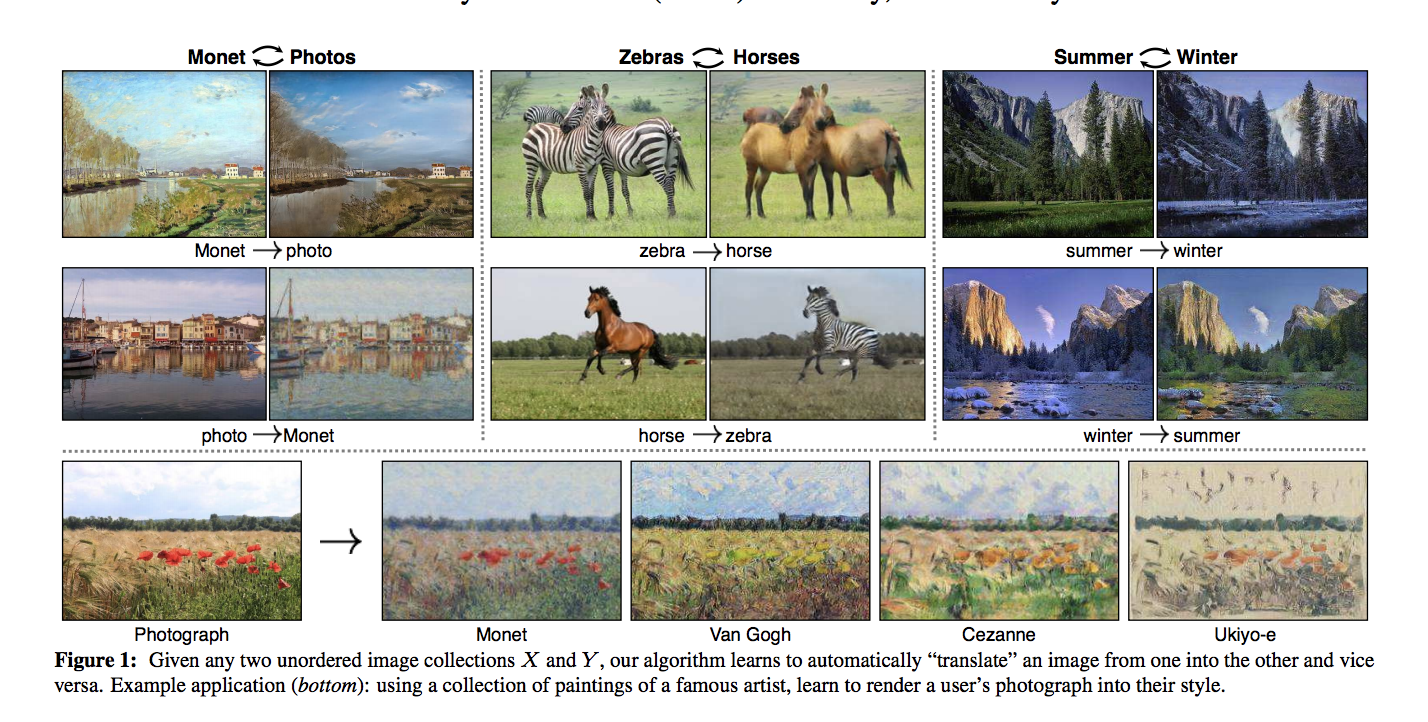

Notice `CycleGAN` was not published in TorchVision but was implemented by Zhu, Park, and Wang using PyTorch. See more information about the implementation of CycleGAN here: 
* https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix

* https://colab.research.google.com/github/junyanz/pytorch-CycleGAN-and-pix2pix/blob/master/CycleGAN.ipynb


**Now let's focus on how to use a pretrained network to turn horses into zebras**:

First, we need to implement a generator network. We use the following code to define a ResNetGenerator class. Don't worry if you don't understand the code. 

In [30]:
import torch
import torch.nn as nn

class ResNetBlock(nn.Module): # <1>

    def __init__(self, dim):
        super(ResNetBlock, self).__init__()
        self.conv_block = self.build_conv_block(dim)

    def build_conv_block(self, dim):
        conv_block = []

        conv_block += [nn.ReflectionPad2d(1)]

        conv_block += [nn.Conv2d(dim, dim, kernel_size=3, padding=0, bias=True),
                       nn.InstanceNorm2d(dim),
                       nn.ReLU(True)]

        conv_block += [nn.ReflectionPad2d(1)]

        conv_block += [nn.Conv2d(dim, dim, kernel_size=3, padding=0, bias=True),
                       nn.InstanceNorm2d(dim)]

        return nn.Sequential(*conv_block)

    def forward(self, x):
        out = x + self.conv_block(x) # <2>
        return out


class ResNetGenerator(nn.Module):

    def __init__(self, input_nc=3, output_nc=3, ngf=64, n_blocks=9): # <3> 

        assert(n_blocks >= 0)
        super(ResNetGenerator, self).__init__()

        self.input_nc = input_nc
        self.output_nc = output_nc
        self.ngf = ngf

        model = [nn.ReflectionPad2d(3),
                 nn.Conv2d(input_nc, ngf, kernel_size=7, padding=0, bias=True),
                 nn.InstanceNorm2d(ngf),
                 nn.ReLU(True)]

        n_downsampling = 2
        for i in range(n_downsampling):
            mult = 2**i
            model += [nn.Conv2d(ngf * mult, ngf * mult * 2, kernel_size=3,
                                stride=2, padding=1, bias=True),
                      nn.InstanceNorm2d(ngf * mult * 2),
                      nn.ReLU(True)]

        mult = 2**n_downsampling
        for i in range(n_blocks):
            model += [ResNetBlock(ngf * mult)]

        for i in range(n_downsampling):
            mult = 2**(n_downsampling - i)
            model += [nn.ConvTranspose2d(ngf * mult, int(ngf * mult / 2),
                                         kernel_size=3, stride=2,
                                         padding=1, output_padding=1,
                                         bias=True),
                      nn.InstanceNorm2d(int(ngf * mult / 2)),
                      nn.ReLU(True)]

        model += [nn.ReflectionPad2d(3)]
        model += [nn.Conv2d(ngf, output_nc, kernel_size=7, padding=0)]
        model += [nn.Tanh()]

        self.model = nn.Sequential(*model)

    def forward(self, input): # <3>
        return self.model(input)

### 3.1 Instantiate this `ResNetGenerator()` class with default parameters (2 points)

In [31]:
# Instantiating the class with default parameters means you don't need to pass any
# parameters into the class. The created generator model will contain random weights.

In [32]:
netG = ResNetGenerator()

### 3.2 Load the weights into the model (2 points)

The generator model has already been pretrained on the horse2zebra dataset, whose training set contains two sets of 1068 and 1335 images of horses and zebras, respectively.

Notice that a common PyTorch convention is to save models using either a .pt or .pth file extension. 
Let's download the weights via the following link. 

https://github.com/deep-learning-with-pytorch/dlwpt-code/blob/master/data/p1ch2/horse2zebra_0.4.0.pth

In [33]:
cd '/content'

/content


In [34]:
!wget https://github.com/deep-learning-with-pytorch/dlwpt-code/raw/master/data/p1ch2/horse2zebra_0.4.0.pth

--2022-11-11 16:30:03--  https://github.com/deep-learning-with-pytorch/dlwpt-code/raw/master/data/p1ch2/horse2zebra_0.4.0.pth
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/deep-learning-with-pytorch/dlwpt-code/master/data/p1ch2/horse2zebra_0.4.0.pth [following]
--2022-11-11 16:30:03--  https://raw.githubusercontent.com/deep-learning-with-pytorch/dlwpt-code/master/data/p1ch2/horse2zebra_0.4.0.pth
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 45519250 (43M) [application/octet-stream]
Saving to: ‘horse2zebra_0.4.0.pth’

horse2zebra_0.4.0.p 100%[===================>]  43.41M  --.-KB/s    in 

Load these weights into `ResNetGenerator` using `load_state_dict()`. 



In [35]:
model_path = 'horse2zebra_0.4.0.pth'
model_data = torch.load(model_path)
netG.load_state_dict(model_data)

<All keys matched successfully>

In [ ]:
# Notice that the load_state_dict() function takes a dictionary object, NOT a path to a saved object. 
# Therefore you need to first use torch.load() to deserialize pickled object files (.pth file) to memory.

# torch.load(path/to/.pth)
# model.load_state_dict()

Put the network in eval mode, as what we did in the class.

In [36]:
# In[4]:
netG.eval()

ResNetGenerator(
  (model): Sequential(
    (0): ReflectionPad2d((3, 3, 3, 3))
    (1): Conv2d(3, 64, kernel_size=(7, 7), stride=(1, 1))
    (2): InstanceNorm2d(64, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (3): ReLU(inplace=True)
    (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (5): InstanceNorm2d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (8): InstanceNorm2d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (9): ReLU(inplace=True)
    (10): ResNetBlock(
      (conv_block): Sequential(
        (0): ReflectionPad2d((1, 1, 1, 1))
        (1): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1))
        (2): InstanceNorm2d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
        (3): ReLU(inplace=True)
        (4): ReflectionPad2d((1, 1, 1, 1))
     

### 3.3 Pre-process the input horse image (4 points)

---



In [37]:
# Download the following input horse image
!wget https://i0.wp.com/www.horsetalk.co.nz/wp-content/uploads/2016/08/shiny-coat-stock.jpg?resize=800%2C445 -O horse.jpeg

# Use PIL's Image module to show the image

# Specify image transformations
# - Resize the image to 256×256 pixels
# - Convert to tensor

--2022-11-11 16:30:16--  https://i0.wp.com/www.horsetalk.co.nz/wp-content/uploads/2016/08/shiny-coat-stock.jpg?resize=800%2C445
Resolving i0.wp.com (i0.wp.com)... 192.0.77.2
Connecting to i0.wp.com (i0.wp.com)|192.0.77.2|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 90348 (88K) [image/jpeg]
Saving to: ‘horse.jpeg’

horse.jpeg          100%[===================>]  88.23K  --.-KB/s    in 0.002s  

2022-11-11 16:30:16 (34.9 MB/s) - ‘horse.jpeg’ saved [90348/90348]



In [38]:
preprocess = transforms.Compose([transforms.Resize(256),
                                  transforms.ToTensor()])


In [39]:
img = Image.open('/content/horse.jpeg')

In [40]:
img_t = preprocess(img)
batch_t = torch.unsqueeze(img_t, 0)

### 3.4 Prepare a batch to be passed through the network (4 points)

In [41]:
batch_out = netG(batch_t)

### 3.5 Model inference (3 points)

In [ ]:
# Send prepared batch to the model
# Take a look at the output of generator
# Print out the shape of the output

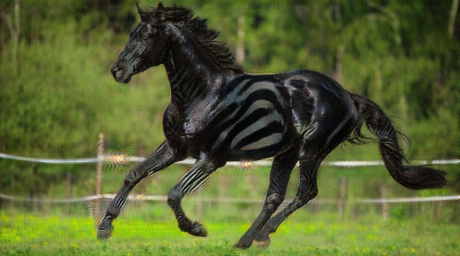

In [56]:
out_t = (batch_out.data.squeeze() + 1.0) / 2.0
out_img = transforms.ToPILImage()(out_t)
out_img


### 3.6 Convert the output back to an image (3 points)

In [64]:
out_img.save('horse_to_zebra.jpg')

In [58]:
img = cv2.imread('/content/horse_to_zebra.jpg')


In [59]:
img.shape

(256, 460, 3)

In [ ]:
# 1) Use `torch.squeeze()` to get a tensor with all the dimensions of input of size 1 removed. 

# 2) You may notice that the generator output has negative values. This will cause weird color patches 
#    when we use PIL Image to display the image in the next step. To avoid this issue, take a look at 
#    the min and max of the tensor, and recale values (for example, you can try linear transformation) to make sure all of them 
#    are positive and less than 1.

# 3) Then use `torchvision.transforms.ToPILImage()(output)' to convert the tensor to a PIL zebra image.

### 3.7 Feed the following image of a golden retriever into the horse-to-zebra model and show the output. What does the output look like? (2 points).



In [60]:
# Download the following input horse image
!wget https://vetstreet.brightspotcdn.com/dims4/default/d742db0/2147483647/thumbnail/645x380/quality/90/?url=https%3A%2F%2Fvetstreet-brightspot.s3.amazonaws.com%2F98%2Fd98250a0d311e0a2380050568d634f%2Ffile%2FGolden-Retriever-3-645mk062411.jpg -O dog.jpeg


--2022-11-11 17:13:36--  https://vetstreet.brightspotcdn.com/dims4/default/d742db0/2147483647/thumbnail/645x380/quality/90/?url=https%3A%2F%2Fvetstreet-brightspot.s3.amazonaws.com%2F98%2Fd98250a0d311e0a2380050568d634f%2Ffile%2FGolden-Retriever-3-645mk062411.jpg
Resolving vetstreet.brightspotcdn.com (vetstreet.brightspotcdn.com)... 13.35.8.40, 13.35.8.84, 13.35.8.11, ...
Connecting to vetstreet.brightspotcdn.com (vetstreet.brightspotcdn.com)|13.35.8.40|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 77522 (76K) [image/jpeg]
Saving to: ‘dog.jpeg’

dog.jpeg            100%[===================>]  75.71K  --.-KB/s    in 0.001s  

2022-11-11 17:13:36 (56.7 MB/s) - ‘dog.jpeg’ saved [77522/77522]



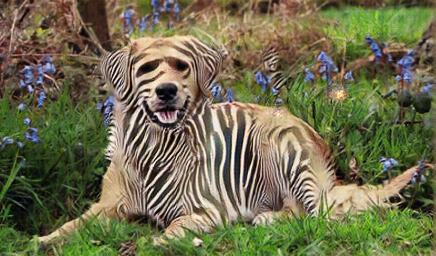

In [65]:
img = Image.open('/content/dog.jpeg')
img_t = preprocess(img)
batch_t = torch.unsqueeze(img_t, 0)
batch_out = netG(batch_t)
out_t = (batch_out.data.squeeze() + 1.0) / 2.0
out_img = transforms.ToPILImage()(out_t)
out_img.save('zebra_dog.jpg')
out_img

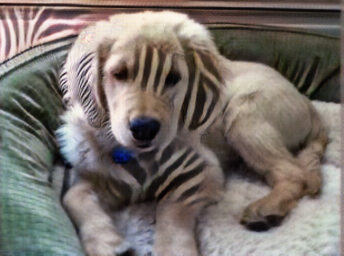

In [66]:
img = Image.open('/content/Personal_Dog_pic.jpg')
img_t = preprocess(img)
batch_t = torch.unsqueeze(img_t, 0)
batch_out = netG(batch_t)
out_t = (batch_out.data.squeeze() + 1.0) / 2.0
out_img = transforms.ToPILImage()(out_t)
out_img.save('Personal_Dog_to_zebra.jpg')
out_img